# K-Nearest Neighbour Algorithm

# Muhammad Nadeem                   201980050

## Submitted to : Sir Usman Ali

    report date: 1/30/2023

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Data Preprocessing

In [2]:
def update_paths(folder_path, folder_number):
    folder_number = str(folder_number)
    location = folder_path.replace(folder_path[16 : 16+3], folder_number)
    return location, location.replace('inner', 'outer'), extract_label(location).replace('_inner', '')


In [3]:
def read_files(path_1 = 'input/healthy_BRB.csv', path_2 = 'input/unhealthy_BRB_rotor.csv'):
    return pd.DataFrame(pd.read_csv(path_1)[' Current-A']).values[:100000], pd.DataFrame(pd.read_csv(path_2)[' Current-A']).values[:100000]


In [157]:
def do_the_work(frame_1, frame_2, path_1 = 'input/healthy_BRB.csv', path_2 = 'input/unhealthy_BRB_rotor.csv', output_file = 'Healthy and Unhealthy rotor'):
    reshaped_frame_1, reshaped_frame_2 = reshape(frame_1, frame_2)
    reshaped_frame_1, reshaped_frame_2 = do_labeling(reshaped_frame_1, reshaped_frame_2, path_1, path_2)
    all_data_Frames.append(reshaped_frame_1)
    all_data_Frames.append(reshaped_frame_2)
    merge_and_write([reshaped_frame_1, reshaped_frame_2], output_file)


In [151]:
def reshape(df1, df2):

    col = range(1000)
    reshaped_df1 = pd.DataFrame(columns=col)
    reshaped_df2 = pd.DataFrame(columns=col)

    row_index = 0
    for x in range(0, len(df1), 1000):
        reshaped_df1 = pd.concat([reshaped_df1, pd.DataFrame(df1[x:x+1000].T, index=[row_index])])
        row_index = row_index + 1

    row_index = 0
    for x in range(0, len(df2), 1000):
        reshaped_df2 = pd.concat([reshaped_df2, pd.DataFrame(df2[x:x+1000].T, index=[row_index])])
        row_index = row_index + 1

    return reshaped_df1, reshaped_df2

In [152]:
def do_labeling(df_1, df_2, p_1, p_2):
    label_file_1 = extract_label(p_1)
    label_file_2 = extract_label(p_2)
    label_it(df_1, label_file_1)
    label_it(df_2, label_file_2)
    return df_1, df_2

In [153]:
def extract_label(file_path):
    return file_path[6:len(file_path) - 4]

In [566]:
def label_it(d_frame, label):
    d_frame['Status'] = label

In [181]:
def merge_and_write(list_of_data_frames, output_path):
    merged = pd.concat([x for x in list_of_data_frames])
    merged.to_csv('output/'+output_path+'.csv', index=False)

In [202]:
if __name__ == '__main__':

    path = 'input/unhealthy_0.7_inner_bearing.csv'
    all_data_Frames = []
    file_number = 0.7

    for i in range(1):
        for j in range(6):
            file1_path, file2_path, output_file_path = update_paths(path, file_number)
            file_1, file_2 = read_files(file1_path, file2_path)
            do_the_work(file_1, file_2, file1_path, file2_path, output_file_path)
            file_number = round(file_number + .2, 1)

        file_1, file_2 = read_files()
        do_the_work(file_1, file_2)
        merge_and_write(all_data_Frames, 'Final_Data-Frame')



# PCA built-in implementation

In [439]:
df = pd.read_csv('output/Final_Data-Frame.csv')

In [442]:
scaler_1 = StandardScaler()

In [443]:
scaled_df = pd.DataFrame(scaler_1.fit_transform(df.drop('Status', axis=1)))

In [447]:
pca = PCA()

In [448]:
pca.fit(scaled_df)

PCA()

In [449]:
principle_components = pca.transform(scaled_df)

In [450]:
principle_components

array([[ 1.47369157e+01,  1.58081558e+01,  3.96541849e+00, ...,
         2.17140792e-04, -2.16605403e-04,  3.92525752e-05],
       [-4.00397425e+01,  6.46077365e+00,  2.57660216e+00, ...,
         1.91172294e-03, -4.52921316e-04,  9.67427885e-04],
       [-5.91918289e+00, -2.15920568e+01,  1.64370119e+00, ...,
         5.80918538e-05,  7.31974368e-04,  1.27167175e-04],
       ...,
       [-3.78110094e+01,  4.86478000e+00,  4.55017074e+00, ...,
        -3.46431262e-04, -3.01788108e-04,  6.42276458e-04],
       [-6.20864314e+00, -1.78663411e+01, -3.21305369e-01, ...,
         7.43576804e-04,  5.88589345e-04, -6.41774420e-04],
       [ 3.66968459e+01, -2.69336707e+00, -4.04490694e+00, ...,
        -2.95317435e-04, -9.99319720e-04,  7.14233637e-04]])

In [451]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=0)

In [452]:
per_var = per_var[per_var > 0]

In [453]:
per_var

array([67., 30.,  3.])

In [545]:
transformed_data = pd.DataFrame(principle_components[:, :len(per_var)])

In [547]:
transformed_data.head()

,0,1,2
0,14.736916,15.808156,3.965418
1,-40.039742,6.460774,2.576602
2,-5.919183,-21.592057,1.643701
3,39.259785,0.546661,-3.521841
4,-9.474476,21.236562,0.186148


# PCA from scratch

In [461]:
input_features = df.drop('Status', axis=1)

In [462]:
input_features.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,2.3309,...,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228
1,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,2.7228,...,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524
2,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,2.9524,...,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111
3,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,2.1111,...,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282
4,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,2.1282,...,2.9805,2.9805,2.9805,2.9805,2.9805,3.0024,3.0024,3.0024,3.0024,3.0024


In [463]:
scaler = StandardScaler()

In [464]:
scaler.fit(input_features)

StandardScaler()

In [465]:
scaled_input_features = pd.DataFrame(scaler.transform(input_features))

In [466]:
scaled_input_features.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.395292,-0.395535,-0.396342,-0.396525,-0.396787,-0.396920,-0.396901,-0.396898,-0.397111,-0.396918,...,0.633956,0.633611,0.634134,0.634498,0.634982,0.634480,0.635019,0.634984,0.634720,0.633957
1,0.625839,0.625413,0.623738,0.623687,0.623607,0.623665,0.623552,0.623157,0.622925,0.623742,...,1.234719,1.234418,1.234909,1.235298,1.235674,1.235255,1.235636,1.235522,1.235352,1.234420
2,1.224083,1.223549,1.221366,1.221392,1.221418,1.221588,1.221398,1.220771,1.220527,1.221710,...,-0.966597,-0.967058,-0.966450,-0.966153,-0.965381,-0.966106,-0.965144,-0.964968,-0.965483,-0.965798
3,-0.968001,-0.968141,-0.968462,-0.968719,-0.969082,-0.969322,-0.969229,-0.969004,-0.969206,-0.969363,...,-0.921854,-0.922311,-0.921706,-0.921407,-0.920643,-0.921362,-0.920411,-0.920242,-0.920749,-0.921077
4,-0.923445,-0.923594,-0.923952,-0.924203,-0.924559,-0.924790,-0.924703,-0.924495,-0.924698,-0.924828,...,1.308245,1.307948,1.308436,1.308828,1.309190,1.366086,1.366433,1.366302,1.366152,1.365183


In [469]:
cov_matrix = scaled_input_features.cov()

In [470]:
cov_matrix

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000715,1.000597,1.000304,1.000197,1.000091,0.999933,0.999844,0.999587,0.999519,0.999284,...,-0.297721,-0.298299,-0.299132,-0.299462,-0.299520,-0.299517,-0.300071,-0.300554,-0.300936,-0.301472
1,1.000597,1.000715,1.000422,1.000314,1.000209,1.000051,0.999961,0.999704,0.999637,0.999401,...,-0.296820,-0.297398,-0.298230,-0.298560,-0.298617,-0.298614,-0.299174,-0.299657,-0.300039,-0.300575
2,1.000304,1.000422,1.000715,1.000607,1.000502,1.000344,1.000255,0.999997,0.999930,0.999696,...,-0.296167,-0.296747,-0.297615,-0.297949,-0.298009,-0.298006,-0.298565,-0.299100,-0.299483,-0.300020
3,1.000197,1.000314,1.000607,1.000715,1.000609,1.000452,1.000362,1.000104,1.000037,0.999803,...,-0.295367,-0.295947,-0.296815,-0.297149,-0.297214,-0.297209,-0.297768,-0.298303,-0.298686,-0.299223
4,1.000091,1.000209,1.000502,1.000609,1.000715,1.000557,1.000468,1.000210,1.000142,0.999908,...,-0.295043,-0.295623,-0.296491,-0.296833,-0.296901,-0.296906,-0.297465,-0.298001,-0.298383,-0.298925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.299517,-0.298614,-0.298006,-0.297209,-0.296906,-0.296525,-0.295739,-0.295540,-0.295363,-0.295998,...,0.999903,1.000084,1.000304,1.000361,1.000509,1.000715,1.000571,1.000302,1.000241,1.000062
996,-0.300071,-0.299174,-0.298565,-0.297768,-0.297465,-0.297084,-0.296298,-0.296099,-0.295921,-0.296557,...,0.999759,0.999941,1.000160,1.000217,1.000364,1.000571,1.000715,1.000446,1.000385,1.000207
997,-0.300554,-0.299657,-0.299100,-0.298303,-0.298001,-0.297620,-0.296838,-0.296663,-0.296486,-0.297120,...,0.999491,0.999672,0.999892,0.999949,1.000096,1.000302,1.000446,1.000715,1.000654,1.000475
998,-0.300936,-0.300039,-0.299483,-0.298686,-0.298383,-0.298016,-0.297229,-0.297055,-0.296877,-0.297511,...,0.999429,0.999610,0.999830,0.999888,1.000034,1.000241,1.000385,1.000654,1.000715,1.000536


In [471]:
eigen_vector_values = np.linalg.eig(cov_matrix)

In [472]:
eigen_vector_values

(array([6.68230870e+02, 2.99472991e+02, 2.82064406e+01, 2.04867735e+00,
        5.30769868e-01, 2.84948013e-01, 1.93251667e-01, 1.45723367e-01,
        1.38939512e-01, 1.21363213e-01, 1.16209200e-01, 1.09917619e-01,
        9.65047403e-02, 9.34203259e-02, 6.01586520e-02, 4.25119246e-02,
        3.33982015e-02, 3.12186296e-02, 2.81182078e-02, 2.74796323e-02,
        2.59527477e-02, 2.53628476e-02, 2.40229634e-02, 2.17246774e-02,
        2.03282074e-02, 1.98673280e-02, 1.82164849e-02, 1.50163105e-02,
        1.36175747e-02, 1.28458459e-02, 1.22252846e-02, 1.15286595e-02,
        1.10532526e-02, 1.03795862e-02, 9.83953087e-03, 9.65245588e-03,
        9.35051388e-03, 9.11953174e-03, 8.94625246e-03, 8.54637252e-03,
        8.11436240e-03, 8.05593094e-03, 7.57286515e-03, 7.27998895e-03,
        7.07319856e-03, 7.01752811e-03, 6.55180217e-03, 6.19771811e-03,
        6.12238250e-03, 5.70269861e-03, 5.56977161e-03, 5.31383992e-03,
        5.23139023e-03, 5.14351219e-03, 4.87346019e-03, 4.813125

In [411]:
eigen_vector_values[0]

array([6.68230870e+02, 2.99472991e+02, 2.82064406e+01, 2.04867735e+00,
       5.30769868e-01, 2.84948013e-01, 1.93251667e-01, 1.45723367e-01,
       1.38939512e-01, 1.21363213e-01, 1.16209200e-01, 1.09917619e-01,
       9.65047403e-02, 9.34203259e-02, 6.01586520e-02, 4.25119246e-02,
       3.33982015e-02, 3.12186296e-02, 2.81182078e-02, 2.74796323e-02,
       2.59527477e-02, 2.53628476e-02, 2.40229634e-02, 2.17246774e-02,
       2.03282074e-02, 1.98673280e-02, 1.82164849e-02, 1.50163105e-02,
       1.36175747e-02, 1.28458459e-02, 1.22252846e-02, 1.15286595e-02,
       1.10532526e-02, 1.03795862e-02, 9.83953087e-03, 9.65245588e-03,
       9.35051388e-03, 9.11953174e-03, 8.94625246e-03, 8.54637252e-03,
       8.11436240e-03, 8.05593094e-03, 7.57286515e-03, 7.27998895e-03,
       7.07319856e-03, 7.01752811e-03, 6.55180217e-03, 6.19771811e-03,
       6.12238250e-03, 5.70269861e-03, 5.56977161e-03, 5.31383992e-03,
       5.23139023e-03, 5.14351219e-03, 4.87346019e-03, 4.81312519e-03,
      

In [412]:
eigen_vector_values[1]

array([[-0.01849477, -0.04525878,  0.07178881, ..., -0.00308507,
        -0.00218731,  0.00013392],
       [-0.0185485 , -0.04523467,  0.07168879, ...,  0.00298945,
         0.02845471, -0.00289307],
       [-0.01867031, -0.04522514,  0.07109854, ..., -0.01981777,
        -0.02231219,  0.02191794],
       ...,
       [-0.01736722,  0.04714875,  0.06560955, ...,  0.00419271,
        -0.00659   ,  0.00863809],
       [-0.01733595,  0.04716106,  0.06570101, ..., -0.03093177,
        -0.01741559, -0.01922475],
       [-0.01725908,  0.04717516,  0.06602937, ...,  0.01470514,
         0.00706365,  0.00757822]])

In [473]:
order_of_index = np.argsort(eigen_vector_values[0])[::-1]

In [474]:
order_of_index

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 103, 104,
       102, 105, 107, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 139, 138, 140, 141, 142,
       143, 145, 144, 146, 147, 148, 149, 150, 151, 153, 152, 157, 154,
       156, 155, 158, 161, 162, 160, 159, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 181, 180, 179, 17

In [475]:
# Ordering eigen vectors in descending order based on eigen values
principle_components_manually = pd.DataFrame(eigen_vector_values[1][:, order_of_index])

In [476]:
principle_components_manually.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,-0.018495,-0.045259,0.071789,-0.070645,-0.005664,0.015312,-0.017026,0.019626,0.010694,0.000131,...,-0.006493,0.017332,-0.004955,0.025047,0.014973,0.009533,0.003321,0.003522,0.004539,-0.015278
1,-0.018549,-0.045235,0.071689,-0.070147,-0.004699,0.014103,-0.014976,0.018861,0.011408,0.001890,...,-0.001867,-0.009499,0.004260,-0.004569,-0.042316,-0.009540,-0.009404,0.004747,-0.009060,0.012953
2,-0.018670,-0.045225,0.071099,-0.069257,-0.002213,0.016386,-0.015891,0.013944,0.013265,-0.000849,...,0.036834,-0.001185,-0.008802,0.003386,0.069182,0.016198,-0.011671,0.029218,-0.011975,0.000498
3,-0.018725,-0.045195,0.070970,-0.069218,-0.001527,0.017151,-0.016344,0.014241,0.013869,-0.000772,...,-0.030644,-0.035467,0.012486,-0.011325,-0.043584,-0.000436,0.005485,-0.026419,0.025296,0.012447
4,-0.018767,-0.045190,0.070801,-0.068627,-0.001187,0.017645,-0.016160,0.013757,0.015755,-0.002435,...,-0.042964,0.001621,-0.007278,-0.026611,0.041633,-0.003667,-0.021788,-0.019897,-0.019074,-0.003132


In [510]:
total_variables = len(principle_components_manually)

In [511]:
total_variables

1000

In [524]:
var_per_vect = np.array([round(x / total_variables * 100) for x in eigen_vector_values[0]])

In [528]:
var_per_vect = var_per_vect[var_per_vect > 0]

In [529]:
var_per_vect

array([67, 30,  3])

In [530]:
labels = ['PC'+str(x) for x in range(1, len(var_per_vect) + 1)]

In [531]:
labels

['PC1', 'PC2', 'PC3']

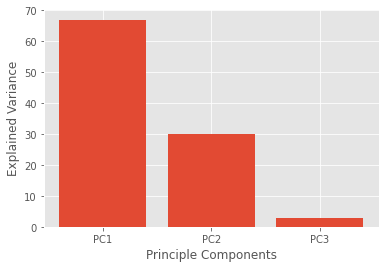

In [533]:
plt.style.use('ggplot')
plt.bar(labels, per_var)
plt.xlabel('Principle Components')
plt.ylabel('Explained Variance')
plt.show()

In [534]:
top_principle_components = pd.DataFrame(principle_components_manually.iloc[:, :len(var_per_vect)])

In [540]:
top_principle_components.head()

,0,1,2
0,-0.018495,-0.045259,0.071789
1,-0.018549,-0.045235,0.071689
2,-0.018670,-0.045225,0.071099
3,-0.018725,-0.045195,0.070970
4,-0.018767,-0.045190,0.070801


In [549]:
low_dimensional_data = pd.DataFrame(np.dot(scaled_input_features, top_principle_components))

In [550]:
low_dimensional_data.head()

,0,1,2
0,14.736916,15.808156,3.965418
1,-40.039742,6.460774,2.576602
2,-5.919183,-21.592057,1.643701
3,39.259785,0.546661,-3.521841
4,-9.474476,21.236562,0.186148


In [559]:
low_dimensional_data.columns.values[:len(labels)] = labels

In [561]:
low_dimensional_data['Status'] = df['Status']

In [579]:
low_dimensional_data.head()

PC1                         14.736916
PC2                         15.808156
PC3                          3.965418
Status    unhealthy_0.7_inner_bearing
Name: 0, dtype: object

# KNN Implementation

## On Principle Components

In [580]:
data_frame = pd.read_csv('output/Principle_Components_labeled.csv')

In [613]:
data_frame.head()

,PC1,PC2,PC3,Status
0,14.736916,15.808156,3.965418,unhealthy_0.7_inner_bearing
1,-40.039742,6.460774,2.576602,unhealthy_0.7_inner_bearing
2,-5.919183,-21.592057,1.643701,unhealthy_0.7_inner_bearing
3,39.259785,0.546661,-3.521841,unhealthy_0.7_inner_bearing
4,-9.474476,21.236562,0.186148,unhealthy_0.7_inner_bearing


In [582]:
X = data_frame.drop('Status', axis = 1)

In [583]:
Y = data_frame['Status']

In [584]:
X.head()

,PC1,PC2,PC3
0,14.736916,15.808156,3.965418
1,-40.039742,6.460774,2.576602
2,-5.919183,-21.592057,1.643701
3,39.259785,0.546661,-3.521841
4,-9.474476,21.236562,0.186148


In [585]:
Y.head()

0    unhealthy_0.7_inner_bearing
1    unhealthy_0.7_inner_bearing
2    unhealthy_0.7_inner_bearing
3    unhealthy_0.7_inner_bearing
4    unhealthy_0.7_inner_bearing
Name: Status, dtype: object

In [586]:
data_frame.shape

(1400, 4)

In [587]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.8)

In [588]:
x_train.head()

,PC1,PC2,PC3
761,-27.576954,-16.238409,-1.874277
1351,42.286822,-0.660346,-8.685333
1189,28.293199,9.914772,2.788235
1284,11.980815,22.154732,-0.391649
962,24.189094,5.981121,-4.122885


In [589]:
x_test.head()

,PC1,PC2,PC3
263,34.995706,-6.437189,-6.624820
1242,-41.320462,-1.913169,6.814996
152,34.043676,4.901535,1.963769
1367,-22.322382,-9.986090,4.991082
321,15.946810,-29.012023,7.344389


In [590]:
y_train.head()

761     unhealthy_1.3_outer_bearing
1351            unhealthy_BRB_rotor
1189    unhealthy_1.7_outer_bearing
1284                    healthy_BRB
962     unhealthy_1.5_outer_bearing
Name: Status, dtype: object

In [591]:
y_test.head()

263     unhealthy_0.9_inner_bearing
1242                    healthy_BRB
152     unhealthy_0.7_outer_bearing
1367            unhealthy_BRB_rotor
321     unhealthy_0.9_outer_bearing
Name: Status, dtype: object

In [592]:
knn = KNeighborsClassifier(round(np.sqrt(len(transformed_data))))

In [593]:
knn

KNeighborsClassifier(n_neighbors=37)

In [594]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=37)

In [595]:
predictions = knn.predict(x_test)

In [596]:
predictions

array(['unhealthy_1.3_inner_bearing', 'unhealthy_0.9_inner_bearing',
       'unhealthy_1.1_outer_bearing', 'unhealthy_BRB_rotor',
       'unhealthy_0.7_outer_bearing', 'unhealthy_1.1_outer_bearing',
       'unhealthy_1.7_inner_bearing', 'unhealthy_1.1_outer_bearing',
       'unhealthy_1.7_inner_bearing', 'unhealthy_0.7_inner_bearing',
       'healthy_BRB', 'unhealthy_1.3_outer_bearing', 'healthy_BRB',
       'unhealthy_1.1_outer_bearing', 'unhealthy_1.7_inner_bearing',
       'unhealthy_0.7_inner_bearing', 'unhealthy_1.3_inner_bearing',
       'unhealthy_1.1_inner_bearing', 'unhealthy_0.9_inner_bearing',
       'unhealthy_1.1_outer_bearing', 'unhealthy_1.7_inner_bearing',
       'unhealthy_1.7_inner_bearing', 'unhealthy_0.7_outer_bearing',
       'unhealthy_1.1_inner_bearing', 'unhealthy_1.1_inner_bearing',
       'unhealthy_1.7_inner_bearing', 'unhealthy_1.7_inner_bearing',
       'unhealthy_0.7_outer_bearing', 'unhealthy_1.7_inner_bearing',
       'unhealthy_0.7_inner_bearing', 'unhe

In [597]:
y_test

263     unhealthy_0.9_inner_bearing
1242                    healthy_BRB
152     unhealthy_0.7_outer_bearing
1367            unhealthy_BRB_rotor
321     unhealthy_0.9_outer_bearing
                   ...             
870     unhealthy_1.5_inner_bearing
934     unhealthy_1.5_outer_bearing
1094    unhealthy_1.7_inner_bearing
654     unhealthy_1.3_inner_bearing
1340            unhealthy_BRB_rotor
Name: Status, Length: 280, dtype: object

In [88]:
confusion_matrix(y_true=y_test, y_pred=predictions)

array([[ 1,  1,  2,  1,  0,  4,  2,  1,  4,  0,  1,  1,  1,  2],
       [ 0,  7,  2,  0,  1,  1,  1,  0,  4,  0,  0,  2,  0,  0],
       [ 0,  6,  3,  0,  4,  0,  0,  0,  2,  2,  0,  6,  0,  1],
       [ 0,  5,  1,  1,  3,  2,  1,  1,  1,  1,  1,  3,  0,  0],
       [ 0,  6,  3,  1,  5,  0,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  3,  2,  0,  1,  3,  5,  0,  1,  0,  0,  0,  3,  0],
       [ 0,  0,  0,  0,  0,  6,  7,  4,  5,  0,  0,  0,  3,  1],
       [ 0,  0,  0,  1,  0,  7,  4,  1,  0,  0,  1,  0,  0,  2],
       [ 3, 10,  2,  0,  1,  0,  3,  0,  2,  1,  0,  1,  0,  2],
       [ 1,  6,  2,  0,  3,  0,  2,  1,  1,  1,  0,  2,  1,  0],
       [ 1,  2,  0,  3,  0,  5,  1,  1,  1,  0,  1,  0,  3,  0],
       [ 0,  7,  4,  0,  6,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  2,  0,  0,  0,  3,  6,  2,  0,  1,  0,  0,  2,  0],
       [ 0,  3,  0,  0,  1,  4,  6,  0,  1,  1,  0,  0,  2,  0]],
      dtype=int64)

In [604]:
print(metrics.classification_report(y_true=y_test, y_pred=predictions))

                             precision    recall  f1-score   support

                healthy_BRB       0.04      0.05      0.05        20
unhealthy_0.7_inner_bearing       0.08      0.16      0.11        19
unhealthy_0.7_outer_bearing       0.08      0.14      0.10        14
unhealthy_0.9_inner_bearing       0.09      0.06      0.07        18
unhealthy_0.9_outer_bearing       0.00      0.00      0.00        26
unhealthy_1.1_inner_bearing       0.10      0.15      0.12        20
unhealthy_1.1_outer_bearing       0.17      0.37      0.23        19
unhealthy_1.3_inner_bearing       0.04      0.06      0.05        18
unhealthy_1.3_outer_bearing       0.17      0.21      0.19        19
unhealthy_1.5_inner_bearing       0.00      0.00      0.00        25
unhealthy_1.5_outer_bearing       0.00      0.00      0.00        20
unhealthy_1.7_inner_bearing       0.17      0.35      0.23        17
unhealthy_1.7_outer_bearing       0.14      0.04      0.06        26
        unhealthy_BRB_rotor      

In [612]:
print('Model is', np.round(metrics.accuracy_score(y_true=y_test, y_pred=predictions) * 100),'% accurate')

Model is 11.0 % accurate


## On un-transformed data

In [6]:
un_transformed_data = pd.read_csv('output/Final_Data-Frame.csv')

In [7]:
X, Y = un_transformed_data.drop('Status', axis = 1), un_transformed_data['Status']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=.8)

In [652]:
knn = KNeighborsClassifier(round(np.sqrt(len(un_transformed_data))))

In [653]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=37)

In [654]:
pred = knn.predict(x_test)

In [655]:
print(classification_report(y_true=y_test, y_pred=pred))

                             precision    recall  f1-score   support

                healthy_BRB       0.05      0.07      0.06        14
unhealthy_0.7_inner_bearing       0.14      0.33      0.20        18
unhealthy_0.7_outer_bearing       0.10      0.15      0.12        20
unhealthy_0.9_inner_bearing       0.00      0.00      0.00        20
unhealthy_0.9_outer_bearing       0.04      0.05      0.05        19
unhealthy_1.1_inner_bearing       0.11      0.06      0.08        31
unhealthy_1.1_outer_bearing       0.11      0.24      0.15        21
unhealthy_1.3_inner_bearing       0.14      0.10      0.11        21
unhealthy_1.3_outer_bearing       0.15      0.20      0.17        20
unhealthy_1.5_inner_bearing       0.00      0.00      0.00        22
unhealthy_1.5_outer_bearing       0.00      0.00      0.00        15
unhealthy_1.7_inner_bearing       0.30      0.27      0.29        22
unhealthy_1.7_outer_bearing       0.12      0.12      0.12        16
        unhealthy_BRB_rotor      

In [660]:
print('Model is', np.round(accuracy_score(y_true=y_test, y_pred=pred) * 100),'% accurate')

Model is 11.0 % accurate


# KNN from scratch

In [1]:
import math

In [2]:
def euclidean_distance(x1, x2):
    distance = 0
    for j in range(len(x1)):
        distance += (x1[j] - x2[j])**2
    return math.sqrt(distance)

In [3]:
def predict(input_train,output_train , test_point, k_):
    distances = []
    for index in range(len(input_train)):
        dist = euclidean_distance(input_train.iloc[index,:], test_point)
        distances.append((output_train.iloc[index], dist))

    distances = sorted(distances, key=lambda x: x[1])
    neighbors = distances[:k_]

    classes = {}
    for neighbor in neighbors:
        label = neighbor[0]
        if label in classes:
            classes[label] += 1
        else:
            classes[label] = 1

    return max(classes, key=classes.get)

In [10]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1052,2.5531,2.5531,2.5531,2.5531,2.5531,2.5531,2.4481,2.4481,2.4481,2.4481,...,2.5836,2.5836,2.5836,2.5836,2.5836,2.5836,2.5836,2.5836,2.5836,2.5836
684,2.1636,2.1636,2.1636,2.1636,2.1636,2.1636,2.1636,2.1636,2.1636,2.1636,...,2.0769,2.0769,2.0769,2.0769,2.0769,2.0769,2.0769,2.0769,2.0769,2.0769
1322,2.9389,2.9389,2.9389,2.9389,2.9389,2.9389,2.9389,2.9389,2.9389,2.9389,...,1.9878,1.9878,1.9878,1.9878,1.9878,1.9878,1.9878,1.9878,1.9878,1.9878
421,2.8022,2.8022,2.8022,2.8022,2.8022,2.8022,2.8022,2.8022,2.8022,2.8022,...,2.9609,2.9609,2.9609,2.9609,2.9609,2.9609,2.9609,2.9609,2.9609,2.9609
583,1.9548,1.9548,1.9548,1.9548,1.9548,1.9548,1.9548,1.9548,1.9548,1.9548,...,2.5092,2.5092,2.5092,2.5092,2.5092,2.5092,2.5092,2.5092,2.5092,2.5092


In [11]:
y_train.head()

1052    unhealthy_1.7_inner_bearing
684     unhealthy_1.3_inner_bearing
1322            unhealthy_BRB_rotor
421     unhealthy_1.1_inner_bearing
583     unhealthy_1.1_outer_bearing
Name: Status, dtype: object

In [12]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1219,2.3272,2.3272,2.3272,2.3272,2.3272,2.3272,2.3272,2.3272,2.3272,2.3272,...,2.8291,2.8291,2.8291,2.8291,2.8291,2.8291,2.8291,2.8291,2.8291,2.8291
1216,2.3907,2.3907,2.3907,2.3907,2.3907,2.3907,2.3907,2.3907,2.3907,2.3907,...,2.5140,2.5140,2.5140,2.5140,2.5140,2.5140,2.5140,2.5140,2.5140,2.5140
1302,2.0476,2.0476,2.0476,2.0476,2.0476,2.0476,2.0476,2.0476,2.0476,2.0476,...,2.5946,2.5946,2.5946,2.5946,2.5946,2.5946,2.5946,2.5946,2.5946,2.5946
252,2.8217,2.8217,2.8217,2.8217,2.8217,2.8217,2.8217,2.8217,2.8217,2.8217,...,2.3272,2.3272,2.3272,2.3272,2.3272,2.3272,2.3272,2.3272,2.3272,2.3272
1305,1.9902,1.9902,1.9902,1.9902,1.9902,1.9902,1.9902,1.9902,1.9902,1.9902,...,3.0525,3.0525,3.0525,3.0525,3.0525,3.0525,3.0525,3.0525,3.0525,3.0525


In [13]:
y_test.head()

1219                    healthy_BRB
1216                    healthy_BRB
1302            unhealthy_BRB_rotor
252     unhealthy_0.9_inner_bearing
1305            unhealthy_BRB_rotor
Name: Status, dtype: object

In [14]:
k = 3
prediction = [predict(x_train, y_train, x_test.iloc[i], k) for i in range(len(x_test))]
prediction

['unhealthy_BRB_rotor',
 'unhealthy_0.7_outer_bearing',
 'healthy_BRB',
 'unhealthy_0.7_inner_bearing',
 'healthy_BRB',
 'unhealthy_0.7_inner_bearing',
 'unhealthy_0.9_outer_bearing',
 'unhealthy_0.9_outer_bearing',
 'unhealthy_1.7_inner_bearing',
 'unhealthy_0.9_outer_bearing',
 'unhealthy_BRB_rotor',
 'unhealthy_0.9_inner_bearing',
 'unhealthy_1.3_outer_bearing',
 'unhealthy_BRB_rotor',
 'unhealthy_0.7_outer_bearing',
 'unhealthy_0.9_outer_bearing',
 'unhealthy_BRB_rotor',
 'unhealthy_0.9_outer_bearing',
 'unhealthy_0.7_outer_bearing',
 'unhealthy_BRB_rotor',
 'unhealthy_1.5_outer_bearing',
 'unhealthy_0.7_inner_bearing',
 'healthy_BRB',
 'unhealthy_1.3_outer_bearing',
 'unhealthy_1.5_outer_bearing',
 'healthy_BRB',
 'unhealthy_1.7_outer_bearing',
 'unhealthy_1.5_inner_bearing',
 'unhealthy_1.3_inner_bearing',
 'unhealthy_BRB_rotor',
 'unhealthy_1.1_inner_bearing',
 'unhealthy_0.7_inner_bearing',
 'unhealthy_0.9_inner_bearing',
 'unhealthy_1.3_outer_bearing',
 'unhealthy_1.3_inner_be

In [21]:
print('Model is ',accuracy_score(y_true = y_test, y_pred = prediction) * 100,'% accurate')

Model is  25.0 % accurate


In [29]:
precision = precision_score(y_test, y_pred = prediction, average='weighted')
print("Precision: ", np.round(precision * 100, decimals=1),'%')

Precision:  26.6 %


In [30]:
recall = recall_score(y_test, y_pred = prediction, average='weighted')
print('Recall:', recall * 100,'%')

Recall: 25.0 %


In [31]:
cm = confusion_matrix(y_true = y_test, y_pred = prediction)
cm

array([[ 0,  1,  1,  0,  0,  0,  1,  1,  0,  0,  3,  0,  1, 15],
       [ 3,  5,  3,  0,  2,  0,  0,  0,  2,  1,  3,  1,  0,  3],
       [ 3,  2,  3,  0,  2,  0,  0,  0,  0,  3,  4,  0,  0,  2],
       [ 1,  1,  2,  4,  0,  0,  1,  2,  2,  0,  1,  3,  3,  1],
       [ 2,  4,  4,  2,  4,  0,  0,  0,  1,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  3,  4,  3,  0,  3,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  0,  2,  9,  5,  4,  1,  3,  0,  1,  1],
       [ 2,  0,  0,  0,  0,  1,  2,  8,  0,  0,  2,  0,  2,  0],
       [ 0,  1,  0,  2,  0,  1,  2,  1,  6,  1,  0,  2,  0,  1],
       [ 1,  2,  2,  0,  4,  3,  0,  3,  0,  4,  0,  1,  1,  1],
       [ 0,  1,  2,  2,  0,  2,  0,  1,  0,  1,  4,  1,  0,  0],
       [ 0,  2,  2,  2,  0,  0,  0,  0,  1,  1,  0, 11,  0,  0],
       [ 1,  0,  0,  2,  0,  1,  1,  2,  0,  0,  2,  0,  9,  2],
       [15,  0,  0,  0,  0,  0,  1,  1,  0,  0,  2,  0,  1,  0]],
      dtype=int64)

In [34]:
sensitivity = cm[1,1] / (cm[1,1] + cm[1,1])
print("Sensitivity:", sensitivity * 100,'%')

Sensitivity: 50.0 %


In [37]:
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print("Specificity: ", np.round(specificity, decimals=1) * 100, '%')

Specificity:  60.0 %


In [41]:
f1 = 2 * (precision * recall) / (precision + recall)
print("F1 Score: ", np.round(f1 * 100), '%')

F1 Score:  26.0 %


## Applying K-fold cross validation using KNN built in Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

# load the csv file into a pandas dataframe
df = pd.read_csv("output/Final_Data-Frame.csv")

# extract the features and target values from the dataframe
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# define the number of folds (k)
k = 10

# create an instance of the KFold class
kfold = KFold(n_splits=k, shuffle=True)

# initialize a list to store the evaluation scores
scores = []

# loop through each fold
for train_index, test_index in kfold.split(X):
    # split the data into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # create an instance of the KNeighborsClassifier
    knn = KNeighborsClassifier()
    
    # fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    # evaluate the classifier on the test data and store the score
    score = knn.score(X_test, y_test)
    scores.append(score)

# calculate the average score across all folds
avg_score = np.mean(scores)
print("Average score:", avg_score)

Average score: 0.18214285714285713


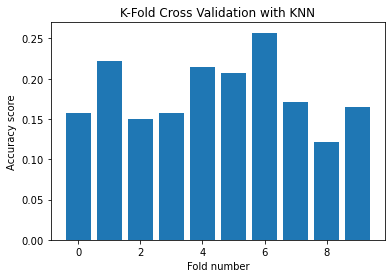

In [7]:
import matplotlib.pyplot as plt

# plot the scores in a bar graph
plt.bar(range(k), scores)
plt.xlabel("Fold number")
plt.ylabel("Accuracy score")
plt.title("K-Fold Cross Validation with KNN")
plt.show()

# KNN Classification measures from scratch

In [2]:
import pandas as pd

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv('output/Principle_Components_labeled.csv')
# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8)

# Train the classifier on your training data
knn.fit(x_train, y_train)

# Predict the labels of your test data
y_pred = knn.predict(x_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Extract the values from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Compute the classification measures
accuracy = (TP + TN) / (TP + TN + FP + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)
specificity = TN / (TN + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the classification measures
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Specificity:", specificity)
print("F1 Score:", f1_score)


[[ 3  4  2  3  0  4  2  0  2  0  0  0  0  2]
 [ 4  9  2  2  0  1  0  0  1  0  0  0  0  0]
 [ 2  6  6  2  0  0  0  0  1  1  2  1  0  0]
 [ 6  2  1  4  2  2  0  1  0  0  0  2  1  0]
 [ 4  6  4  1  4  1  0  1  0  0  0  3  0  0]
 [ 1  2  0  2  0  5  4  1  0  0  1  0  2  1]
 [ 5  0  0  1  0  2 11  2  0  2  1  0  1  0]
 [ 4  0  0  1  0  2  2  2  0  0  0  0  1  0]
 [ 2  3  5  0  2  1  1  2  3  0  0  0  0  0]
 [ 1  3  4  0  0  4  2  3  0  0  0  0  1  0]
 [ 5  1  3  2  0  1  1  1  0  0  2  0  0  0]
 [ 0  6  2  3  0  0  0  0  0  2  0 11  0  0]
 [ 3  0  0  2  0  0  4  2  1  0  0  0  6  0]
 [17  3  0  0  0  1  0  1  0  0  0  0  0  0]]
Accuracy: 0.6
Recall: 0.6923076923076923
Precision: 0.6923076923076923
Specificity: 0.42857142857142855
F1 Score: 0.6923076923076923


# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
df = pd.read_csv('./Output/FinalDataFrame.csv')
scaler_1 = StandardScaler()
scaled_df = pd.DataFrame(scaler_1.fit_transform(df.drop('label', axis=1)))

pca.fit(scaled_df)
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=0)
per_var = per_var[per_var > 0]
per_var

principle_components = pca.transform(scaled_df)
principle_components

input_features = df.drop('label', axis=1)
input_features.head()
scaler = StandardScaler()
scaler.fit(input_features)
scaled_input_features = pd.DataFrame(scaler.transform(input_features))
scaled_input_features.head()
cov_matrix = scaled_input_features.cov()
cov_matrix
eigen_vector_values = np.linalg.eig(cov_matrix)
eigen_vector_values
eigen_vector_values[0]
eigen_vector_values[1]
order_of_index = np.argsort(eigen_vector_values[0])[::-1]
order_of_index
# Ordering eigen vectors in descending order based on eigen values
principle_components_manually = pd.DataFrame(eigen_vector_values[1][:, order_of_index])
principle_components_manually.head()
total_variables = len(principle_components_manually)
total_variables
var_per_vect = np.array([round(x / total_variables * 100) for x in eigen_vector_values[0]])
var_per_vect = var_per_vect[var_per_vect > 0]
var_per_vect
labels = ['PC'+str(x) for x in range(1, len(var_per_vect) + 1)]
labels
plt.style.use('ggplot')
plt.bar(labels, per_var)
plt.xlabel('Principle Components')
plt.ylabel('Explained Variance')
plt.show()
top_principle_components = pd.DataFrame(principle_components_manually.iloc[:, :len(var_per_vect)])
top_principle_components.head()
low_dimensional_data = pd.DataFrame(np.dot(scaled_input_features, top_principle_components))
low_dimensional_data.head()
low_dimensional_data.columns.values[:len(labels)] = labels
low_dimensional_data['label'] = df['label']
low_dimensional_data.head()


# KNN

In [ ]:
import math
def euclidean_distance(x1, x2):
    distance = 0
    for j in range(len(x1)):
        distance += (x1[j] - x2[j])**2
    return math.sqrt(distance)
def predict(input_train,output_train , test_point, k_):
    distances = []
    for index in range(len(input_train)):
        dist = euclidean_distance(input_train.iloc[index,:], test_point)
        distances.append((output_train.iloc[index], dist))

    distances = sorted(distances, key=lambda x: x[1])
    neighbors = distances[:k_]

    classes = {}
    for neighbor in neighbors:
        label = neighbor[0]
        if label in classes:
            classes[label] += 1
        else:
            classes[label] = 1

    return max(classes, key=classes.get)
un_transformed_data = pd.read_csv('Output/FinalDataFrame.csv')
X, y = un_transformed_data.drop('label', axis = 1), un_transformed_data['label']
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=.8)
x_train.head()
y_train.head()
x_test.head()
y_test.head()
k = 3
prediction = [predict(x_train, y_train, x_test.iloc[i], k) for i in range(len(x_test))]
prediction
print('Model is ',accuracy_score(y_true = y_test, y_pred = prediction) * 100,'% accurate')